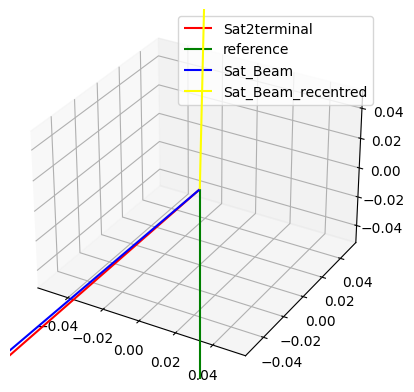

(0.7071696398659454, 0.7069927548959791)

In [8]:
import numpy as np
import pandas as pd
import VectorClass as vc
import math
import matplotlib.pyplot as plt

def plot(pArray, pAx):
    colours = ["red", "green", "blue", "yellow"]
    i = 0
    for row in pArray:
        #ax.cls()
        #print(row)
        pAx.quiver(row[0], row[1], row[2], row[3], row[4], row[5], color=colours[i%4])
        i += 1
    return 0

def change_origin(Vector1,Vector2):
    Normal = Vector1.cross(Vector2)*-1 #Only happens because yaw angle is defined wrong!
    #U_Normal = list(np.around(Normal.unit().cartesian(), 5))
    U_Normal = Normal.unit().cartesian()
    angle = Vector1.angle(Vector2)
    alpha = math.radians(angle)
    ca = round(math.cos(alpha), 5)
    sa = round(math.sin(alpha), 5)

    R_zyx = np.array([[ca + U_Normal[0]**2 * (1 - ca), U_Normal[0] * U_Normal[1] * (1 - ca) - U_Normal[2] * sa, U_Normal[0] * U_Normal[2] * (1 - ca) + U_Normal[1] * sa], 
    [U_Normal[0] * U_Normal[1] * (1 - ca) + U_Normal[2] * sa, ca + U_Normal[1]**2 * (1 - ca), U_Normal[1] * U_Normal[2] * (1 - ca) - U_Normal[0] * sa], 
    [U_Normal[0] * U_Normal[2] * (1 - ca) - U_Normal[1] * sa, U_Normal[1] * U_Normal[2] * (1 - ca) + U_Normal[0] * sa, ca + U_Normal[2]**2 * (1 - ca)]])
    #print(R_zyx[0])
    r_phi = math.atan2(R_zyx[2][1], R_zyx[2][2])
    r_theta = math.asin(-R_zyx[2][0])
    r_psi = math.atan2(R_zyx[0][1], R_zyx[0][0])

    phi = math.degrees(r_phi)
    theta = math.degrees(r_theta)
    psi = math.degrees(r_psi)

    return phi,theta,psi

Sat2terminal=vc.Vector(radius_x=-10,theta_y=45,phi_z=45) 
Sat_Beam=vc.Vector(radius_x=-10,theta_y=45,phi_z=46)

reference=vc.Vector(radius_x=0,theta_y=0,phi_z=-1,coords='cartesian')

phi,theta,psi=change_origin(Vector1=Sat2terminal,Vector2=reference)
Sat_Beam_recentred = Sat_Beam.rotate_euler(phi, theta, psi)
Sat_Beam_recentred=Sat_Beam_recentred.unit()
Sat_Beam_recentred.phi(),Sat_Beam_recentred.theta()

Sat2terminal2=Sat2terminal.rotate_euler(phi, theta, psi)

Vectors = np.array([[0, 0, 0] + Sat2terminal.cartesian(), [0, 0, 0] + reference.cartesian() , [0, 0, 0] + Sat_Beam.cartesian(),[0, 0, 0] + Sat_Beam_recentred.cartesian()])

ax = plt.figure().add_subplot(projection='3d')
plot(Vectors, ax)
ax.legend(["Sat2terminal","reference","Sat_Beam","Sat_Beam_recentred"])
plt.show()


x,y,z=Sat_Beam_recentred.cartesian()
math.atan2(x, z)/np.pi*180,math.atan2(y, z)/np.pi*180#,Vectors


[1.8369701987210297e-16, 1.0, -6.123233995736766e-17]
[0.7071067811865477, 1.0, 0.7071067811865475]
(1.4142135623730951, 144.73561031724535, 60.00000000000001)
(1.0, 180.0, 90.00000000000001)
(1.0, 0.0, 6.444742937248654e-31)
(1, 270, 90)
(1.0, 180.0, 90.0)
(1.0, 90.0, 45.0)
89.99999999999999


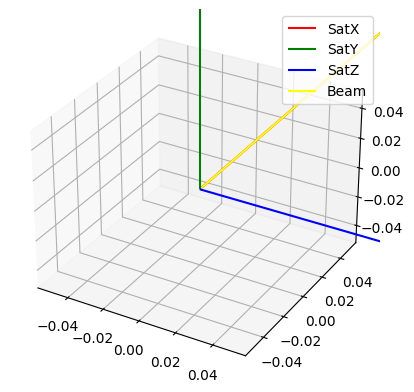

In [35]:
#My method
def rotate_to(Origin, Destination): #Provide Destination Vector to rotate to.
        Normal = Origin.cross(Destination)
        U_Normal = Normal.unit().cartesian() #Finding Unit Normal Vector
        angle = Origin.angle(Destination) #Postitive angle between Vectors
        alpha = math.radians(angle) #Convert to Radians
        ca = round(math.cos(alpha), 5) #Rounding is important to avoid weird issues when dividing.
        sa = round(math.sin(alpha), 5)

        R_zyx = np.array([[ca + U_Normal[0]**2 * (1 - ca), U_Normal[0] * U_Normal[1] * (1 - ca) - U_Normal[2] * sa, U_Normal[0] * U_Normal[2] * (1 - ca) + U_Normal[1] * sa], 
        [U_Normal[0] * U_Normal[1] * (1 - ca) + U_Normal[2] * sa, ca + U_Normal[1]**2 * (1 - ca), U_Normal[1] * U_Normal[2] * (1 - ca) - U_Normal[0] * sa], 
        [U_Normal[0] * U_Normal[2] * (1 - ca) - U_Normal[1] * sa, U_Normal[1] * U_Normal[2] * (1 - ca) + U_Normal[0] * sa, ca + U_Normal[2]**2 * (1 - ca)]])

        r_phi = math.atan2(R_zyx[2][1], R_zyx[2][2])
        r_theta = math.asin(-R_zyx[2][0])
        r_psi = math.atan2(R_zyx[1][0], R_zyx[0][0])

        phi = math.degrees(r_phi)
        theta = math.degrees(r_theta)
        psi = math.degrees(r_psi)

        return phi, theta, psi

#Sat_Pos = vc.Vector(1000, 11, 22)
Sat_Pos = vc.Vector(1, -90, 90)
Sat_Point = -1 * Sat_Pos

t_phi, t_theta, t_psi = rotate_to(vc.Vector(1, 0, 0, 'cartesian'), Sat_Point)

#GS_Pos = vc.Vector(10, 10, 20)
GS_Pos = vc.Vector(1, 0, 45)

Beam_Direction = GS_Pos - Sat_Pos

print(Sat_Point.cartesian())
print(Beam_Direction.cartesian())

referenceVect = Beam_Direction.rotate_euler(t_phi, t_theta, t_psi)
print(referenceVect)
print(Sat_Point.rotate_euler(t_phi, t_theta, t_psi))

print(Sat_Pos.rotate_to(vc.Vector(1, 0, 0)))
print(Sat_Pos)

#Figuring out projections!
#Continuing off the section before

referenceY = vc.Vector(0, 1, 0, 'cartesian').rotate_euler(t_phi, t_theta, t_psi)

#to_North = vc.Vector(4, 3, 5, 'cartesian').unit()
to_North = vc.Vector(0, 1, 1, 'cartesian').unit()

plane_Normal = Sat_Point.unit()

ref_theta = plane_Normal.angle(to_North)

#projected_North = ( 1 - abs(math.cos(math.radians(ref_theta))) ) * to_North
projected_North = to_North - (abs(math.cos(math.radians(ref_theta))) * plane_Normal)

ans_theta = referenceY.angle(projected_North)

F_phi, F_theta, F_psi = rotate_to(referenceY, projected_North)

referenceZ = vc.Vector(0, 0, 1, 'cartesian').rotate_euler(t_phi, t_theta, t_psi)

FinalY = referenceY.rotate_euler(F_phi, F_theta, F_psi)
FinalZ = referenceZ.rotate_euler(F_phi, F_theta, F_psi)
FinalX = Sat_Point.rotate_euler(F_phi, F_theta, F_psi)

print(referenceY)
print(to_North)

print(ans_theta)
#assume the true north vector is provided !

#Vectors = np.array([[0, 0, 0] + Sat_Point.unit().cartesian(), [0, 0, 0] + referenceY.unit().cartesian() , [0, 0, 0] + referenceZ.unit().cartesian()])
#Vectors = np.array([[0, 0, 0] + Sat_Point.unit().cartesian(), [0, 0, 0] + referenceY.unit().cartesian() , [0, 0, 0] + projected_North.unit().cartesian()])

#Final one
Vectors = np.array([[0, 0, 0] + Sat_Point.unit().cartesian(), [0, 0, 0] + FinalY.unit().cartesian() , [0, 0, 0] + FinalZ.unit().cartesian(),[0, 0, 0] + vc.Vector(1, 0, 0, 'cartesian').rotate_euler(t_phi, t_theta, t_psi).unit().cartesian()])


ax = plt.figure().add_subplot(projection='3d')
plot(Vectors, ax)
ax.legend(["SatX","SatY","SatZ","Beam"])
plt.show()
